In [1]:
import matplotlib.pyplot as plt
from pymatgen import Structure
from pymatgen.io.vasp import Poscar, Xdatcar
from pymatgen.analysis.diffusion_analyzer import DiffusionAnalyzer, get_arrhenius_plot, get_extrapolated_conductivity
from tqdm import tqdm

100%|██████████| 6/6 [12:22<00:00, 130.50s/it]


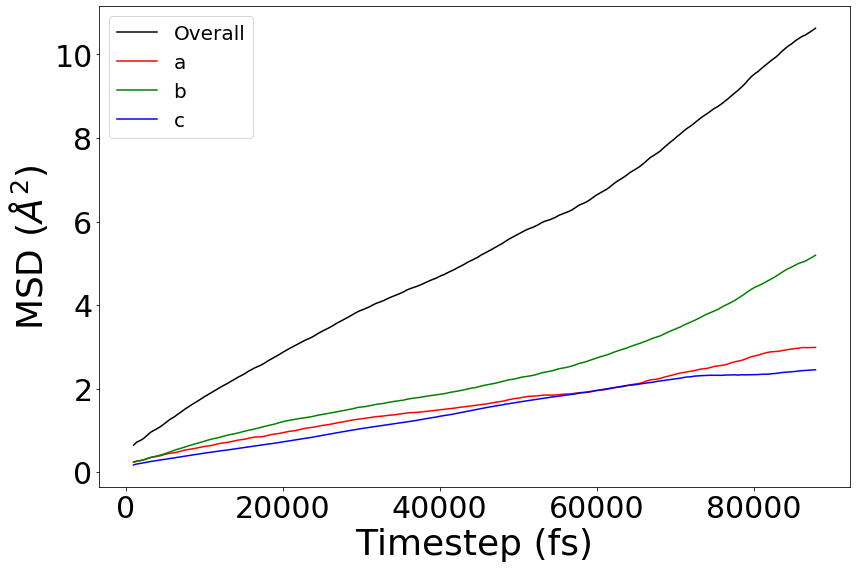

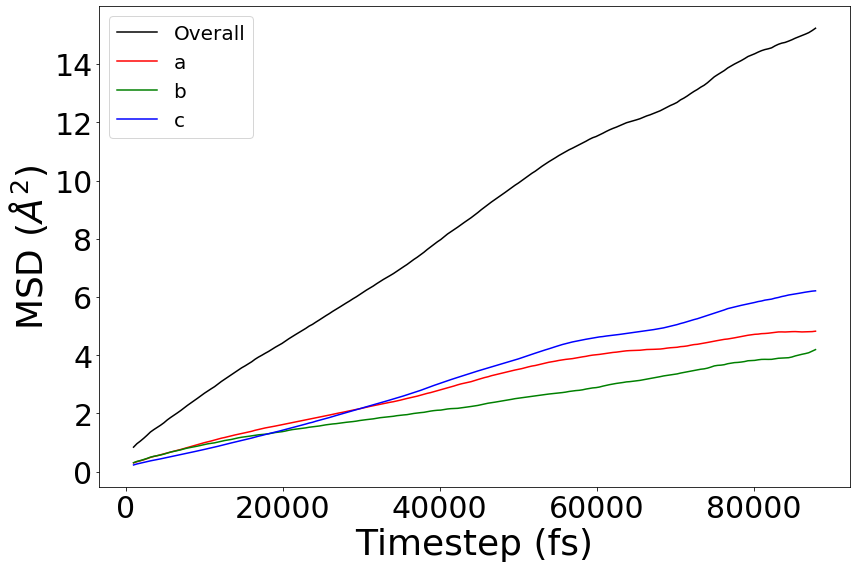

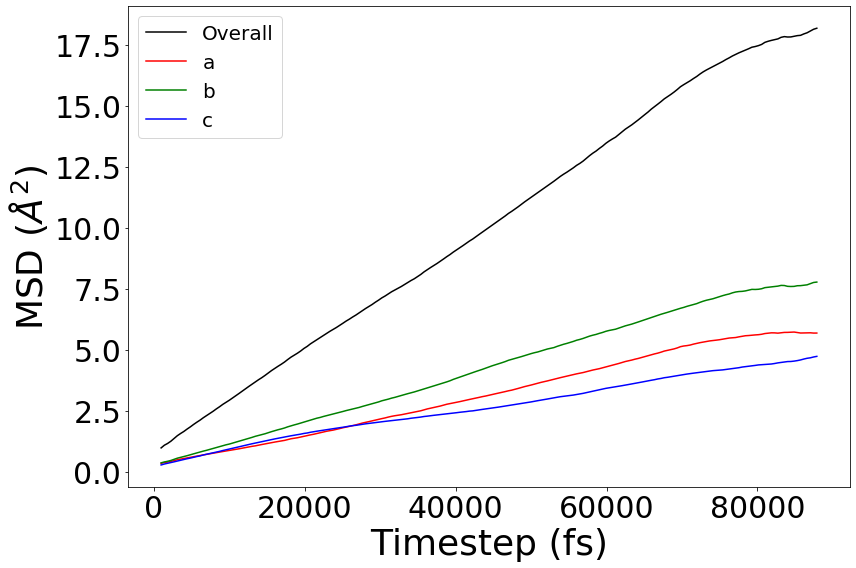

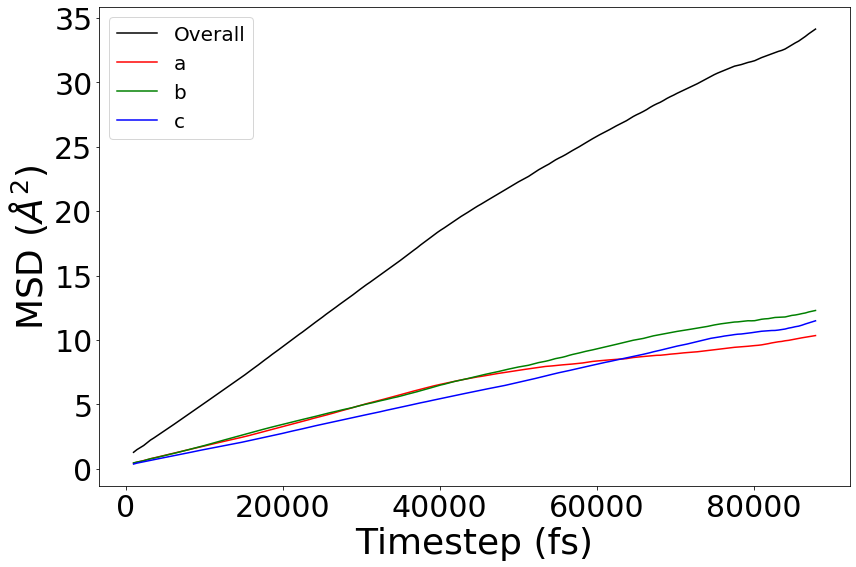

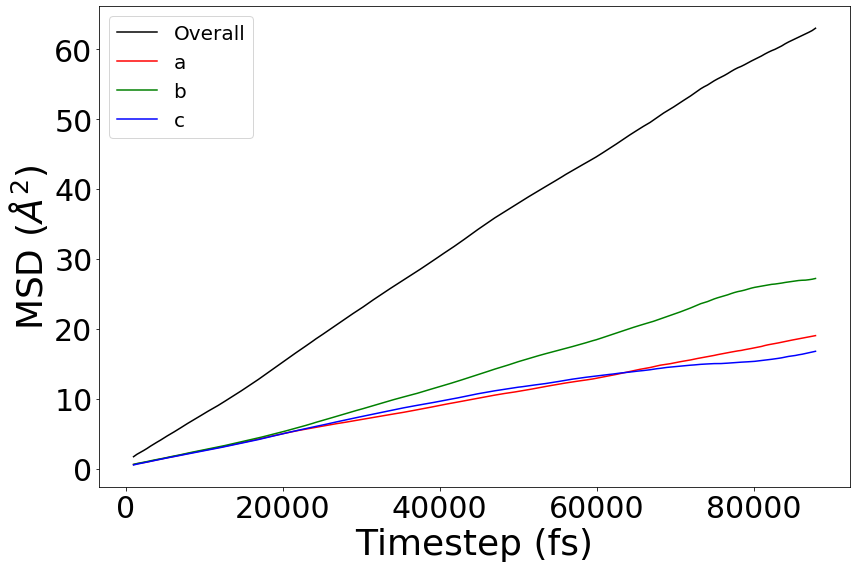

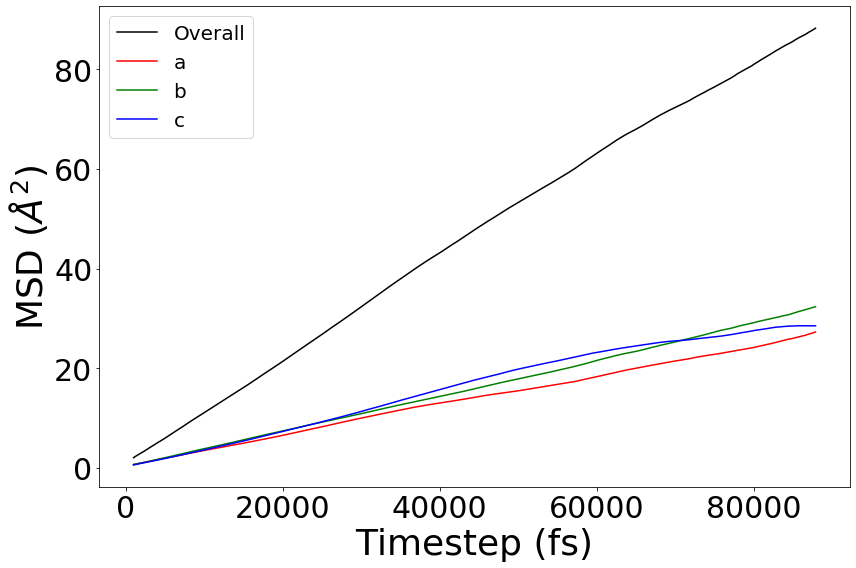

In [2]:
temperatures = [500, 600, 700, 800, 900, 1000]
ge_analyzers = []
ge_diffusivities = []

for i in tqdm(temperatures):
    x1 = Xdatcar(f'data/{i}K/Ge/1/XDATCAR')
    x2 = Xdatcar(f'data/{i}K/Ge/2/XDATCAR')
    x3 = Xdatcar(f'data/{i}K/Ge/3/XDATCAR')
    x4 = Xdatcar(f'data/{i}K/Ge/4/XDATCAR')
    x5 = Xdatcar(f'data/{i}K/Ge/5/XDATCAR')
    structures = x1.structures + x2.structures + x3.structures + x4.structures + x5.structures

    analyzer = DiffusionAnalyzer.from_structures(structures=structures, specie="Na", temperature=float(f'{i}'),
                                                 time_step=2, step_skip=5, smoothed="max", min_obs=100)
    
    ge_analyzers.append(analyzer)
    ge_diffusivities.append(analyzer.diffusivity)
    
    f = open(f"data/{i}K/Ge/diffusivity.dat", "w+")
    f.write(str(analyzer.diffusivity))
    f.close()
    
    plot = analyzer.get_msd_plot()
    plot.savefig(f'data/{i}K/Ge/msd_plot.png', dpi=300)
    
    analyzer.export_msdt(f"data/{i}K/Ge/msd.dat")

The Na ionic conductivity for Na11Ge2PSe12 at 300 K is 7.0073 mS/cm


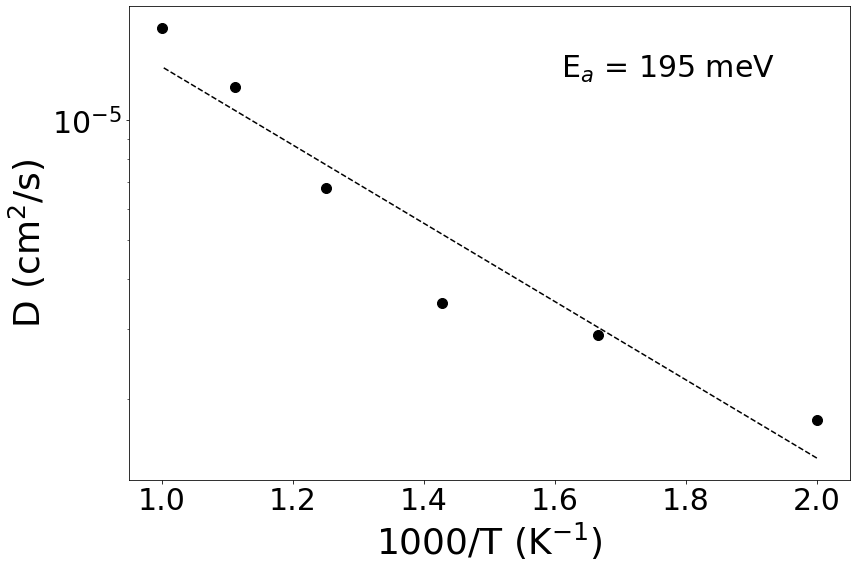

In [9]:
plt = get_arrhenius_plot(temperatures, ge_diffusivities)
plt.savefig('ge_arrhenius_plot.png', dpi=300)

rts = get_extrapolated_conductivity(temperatures, ge_diffusivities, 
                                    new_temp=300, structure=ge_analyzers[0].structure, 
                                    species="Na")
print("The Na ionic conductivity for Na11Ge2PSe12 at 300 K is %.4f mS/cm" % rts)


100%|██████████| 6/6 [17:42<00:00, 183.46s/it]

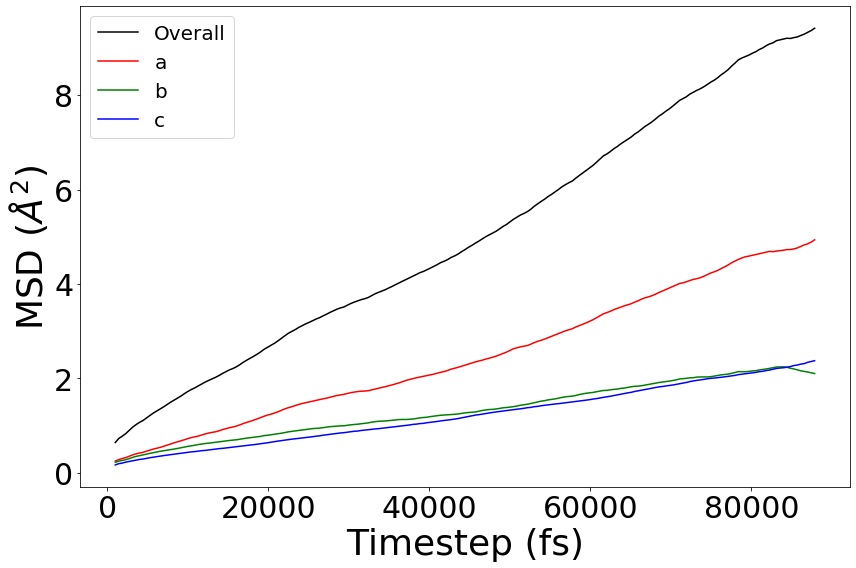

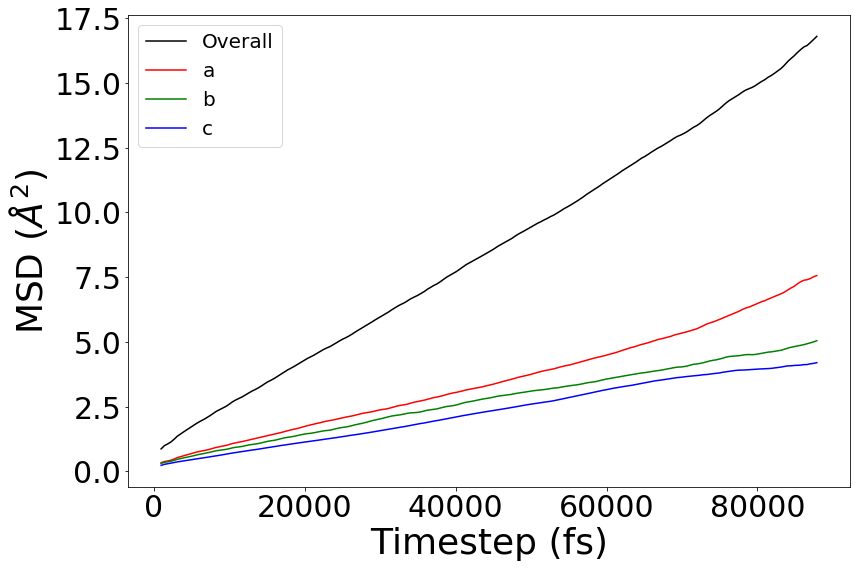

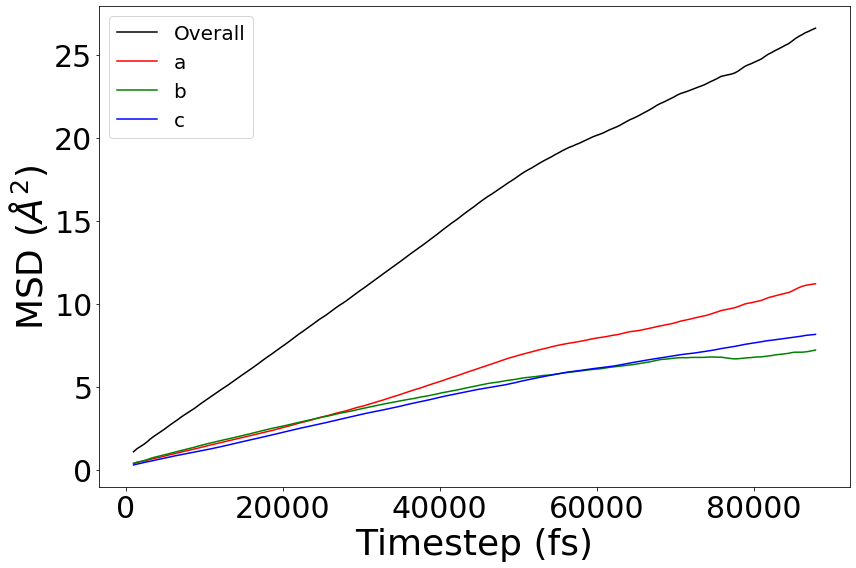

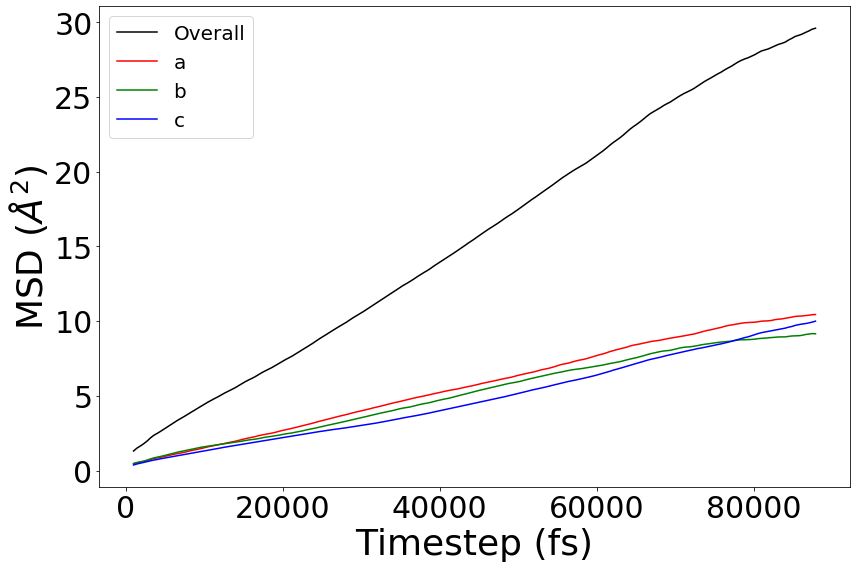

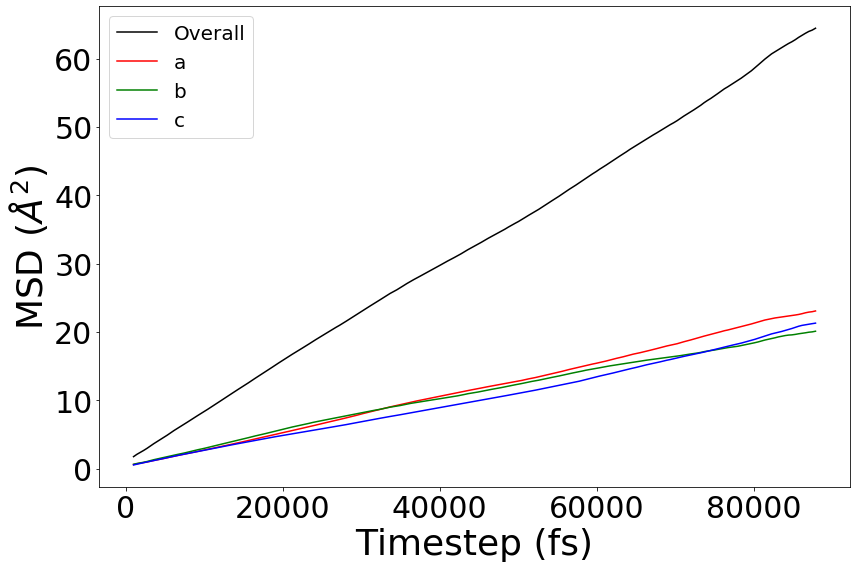

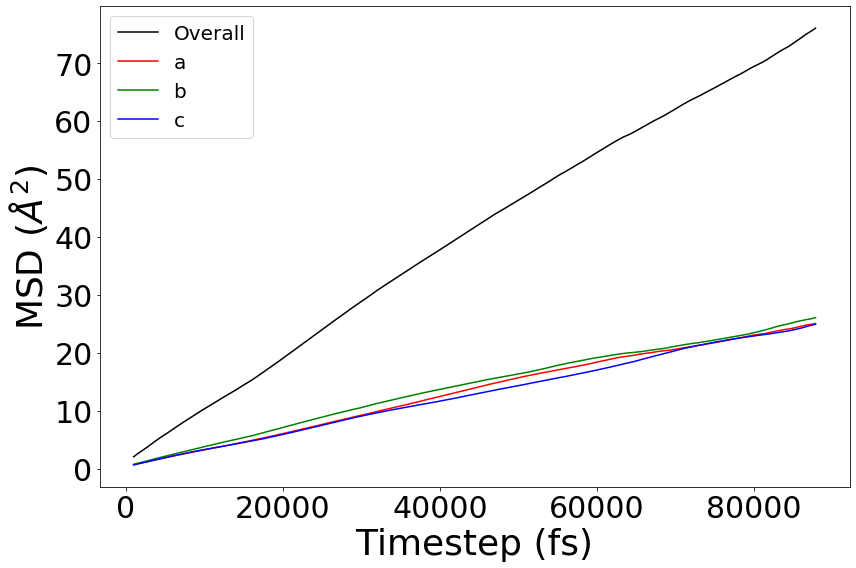

In [5]:
temperatures = [500, 600, 700, 800, 900, 1000]
sn_analyzers = []
sn_diffusivities = []

for i in tqdm(temperatures):
    x1 = Xdatcar(f'data/{i}K/Sn/1/XDATCAR')
    x2 = Xdatcar(f'data/{i}K/Sn/2/XDATCAR')
    x3 = Xdatcar(f'data/{i}K/Sn/3/XDATCAR')
    x4 = Xdatcar(f'data/{i}K/Sn/4/XDATCAR')
    x5 = Xdatcar(f'data/{i}K/Sn/5/XDATCAR')
    structures = x1.structures + x2.structures + x3.structures + x4.structures + x5.structures

    analyzer = DiffusionAnalyzer.from_structures(structures=structures, specie="Na", temperature=float(f'{i}'),
                                                 time_step=2, step_skip=5, smoothed="max", min_obs=100)
    
    sn_analyzers.append(analyzer)
    sn_diffusivities.append(analyzer.diffusivity)
    
    f = open(f"data/{i}K/Sn/diffusivity.dat", "w+")
    f.write(str(analyzer.diffusivity))
    f.close()
    
    plot = analyzer.get_msd_plot()
    plot.savefig(f'data/{i}K/Sn/msd_plot.png', dpi=300)
    
    analyzer.export_msdt(f"data/{i}K/Sn/msd.dat")

The Na ionic conductivity for Na11Sn2PSe12 at 300 K is 8.2601 mS/cm


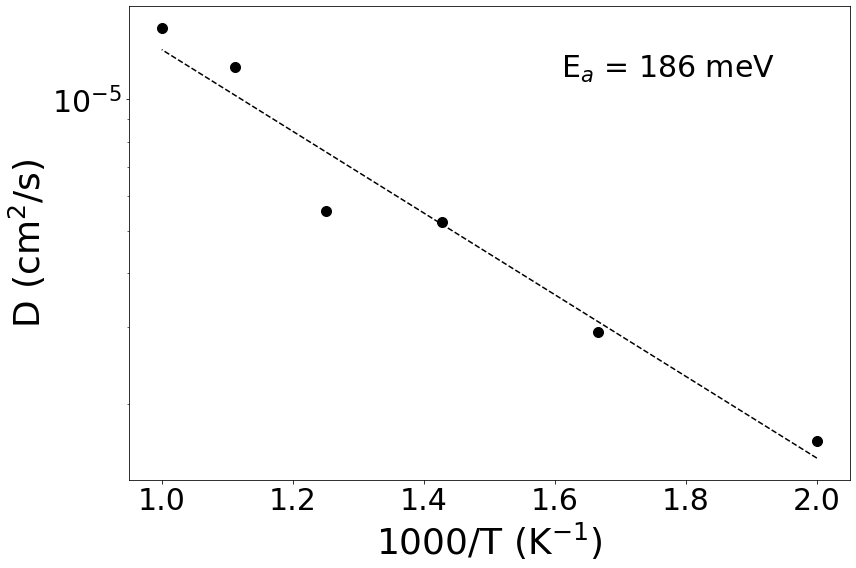

In [10]:
plt = get_arrhenius_plot(temperatures, sn_diffusivities)
plt.savefig('sn_arrhenius_plot.png', dpi=300)

rts = get_extrapolated_conductivity(temperatures, sn_diffusivities, 
                                    new_temp=300, structure=sn_analyzers[0].structure, 
                                    species="Na")
print("The Na ionic conductivity for Na11Sn2PSe12 at 300 K is %.4f mS/cm" % rts)